In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (43.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and dir

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family = 'NnumBarunGothic')

In [ ]:
# 가천대 애드캠퍼스 장점/단점/학교에 바라는 점 불러오기
df = pd.read_csv('애드캠퍼스_가천대_재학생리뷰.csv')
df.head()

,장점,단점,학교에바라는점
0,"전공이 모두 전공선택이라 본인이 관심있는 전공을 골라 들을 수 있음. 전기, 건축,...",소방과와 설비과가 합쳐져 생긴 학과이다 보니 좀 어중간한 느 낌.\n학교 수업 자체...,제발 ** 같은 공대 건물 좀 어떻게 해주세요..\n그리고 설비 소방에 맞는 실험과...
1,캠퍼스가 예쁘고 고양이가 많이 산다. 학교와 지하철이 바로 연결돼있다.\n교내 셔틀...,등록금이 비싸다. 최신식 건물에 비해 노후된 건물이 곳곳에\n있다.\n학교 근처에 ...,교내에서 스터디를 할 수 있는 공간이 필요하다.
2,장학금 제도가 잘되어있다.\n노트북 지원금 및 성적 지원금 등등 그 외에도 여러가지...,한 학번당 인원이 너무 많다보니 서로 누가누구인지 모르는 경\n우가 있다.\n그러다...,학과 분위기 개선 및 신입생에 한 해 원하는 사람들을 신청 받\n아 과동기를 알아가...
3,두루두루 친한 분위기라 과 분위기가 좋다.\n학술답사라던가 다양한 관광경영학과에 맞...,"두루두루 친하기는 하지만,,,, 친목의 흔적들이 남아 있다.\n약간의 꼰대문화가 아...",학교 및 학과에서 취업과 관련된 활동 지원 및 개최.
4,취업률이 높다. 교수진이 화려하고 생긴지 오래되진 않았지만\n선배들도 능력을 펼치는...,수업이 어렵다. 코딩 자체를 포기하는 경우도 종종 있다.\n교수진이 화려한데 학과장...,학교 엘리베이터 문제를 해결할 방법을 찾아야할 것 같다.\n또한 수업을 따라가기 어...


In [ ]:
df.columns

Index(['장점', '단점', '학교에바라는점'], dtype='object')

In [ ]:
df.isnull().sum()

장점         0
단점         0
학교에바라는점    0
dtype: int64


# 형태소 *분석*

In [ ]:
# 빈도수
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup
import re

## 장점 분석

In [ ]:
good_text = ''
for temp in df['장점']:
    good_text += str(temp)
good_text = re.sub(r'[^가-힣a-zA-Z0-9]',' ',good_text)
good_text

'전공이 모두 전공선택이라 본인이 관심있는 전공을 골라 들을 수 있음  전기  건축  소방  열역학  배관 공학  기계공학 등 다 양한 전공선택 과목이 있어서 만족하면서 수업 들었음 소방 or 설비로 진로를 선택한다고 보면 되는데 소방으로 선택 할 경우 공무원을 하거나 소방업체로 가는경우가 많음  설비는 보통 건걸사로 가게 되는데 기본 초봉 5천부터 시작하며 취업 하기 광장히 쉬운편 캠퍼스가 예쁘고 고양이가 많이 산다  학교와 지하철이 바로 연결돼있다  교내 셔틀버스  무당이 가 있다  교내 화장실이 깨끗하다  교내 어디서든 무료 와이파이를 사용할 수 있다  화려하고 예쁜 건물들이 있다  학교 안에 올리브영  당구장 등 편의시설이 많다  교수진이 젊고 재미있다  고학점 취득하기 쉽다  선후배 관계가 원만하고 대체로 문제 없다  학교생활에 도움이 되는 다양한 행사들이 있다장학금 제도가 잘되어있다  노트북 지원금 및 성적 지원금 등등 그 외에도 여러가지 장학 금이 있다  소프트웨어학과를 나름 학교에서 밀어줘서 여러가지 지원이 많은 것 같다  시설이 깔끔하다  교수님이 잘 가르치신다두루두루 친한 분위기라 과 분위기가 좋다  학술답사라던가 다양한 관광경영학과에 맞는 활동들이 있어 서 많은 경험을 할 수 있다  교수님들이 좋으셔서 배울 것이 많다  학업 진로적으로도 많은 도움을 주신다취업률이 높다  교수진이 화려하고 생긴지 오래되진 않았지만 선배들도 능력을 펼치는 중이다  컴공보다 집중적으로 소프트웨어 수업을 들을 수 있다  학점 3 5를 넘기면 장학금도 준다  캠퍼스가 지하철로 연결되어 있어 교통이 편하다 학교 엘리베이터 문제를 해결할 방법을 찾아야할 것 같다  또한 수업을 따라가기 어려운 학생들을 위해 보충 프로그램을 만들면 좋을 것 같다학교와 지하철이 바로 연결되어 있어 통학하기 편하다  고속버 스 정거장도 있다  교수님들이 사회복지를 위해 노력하고 동기들도 열심히 한다  취업이 어렵지는 않다   1  메이커스페이스가 있음  쉽게 설명하자면 실습실인데 3d프 린터

In [ ]:

# Okt 함수를 이용해 형태소 분석
okt = Okt()
g_line =[]

g_line = okt.pos(good_text)

print(g_line)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in g_line:
    if tag in ['Noun','Adjective']:
        if len(word) > 1:
            n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for wor

[('전공', 'Noun'), ('이', 'Josa'), ('모두', 'Noun'), ('전', 'Modifier'), ('공선택', 'Noun'), ('이라', 'Josa'), ('본인', 'Noun'), ('이', 'Josa'), ('관심', 'Noun'), ('있는', 'Adjective'), ('전공', 'Noun'), ('을', 'Josa'), ('골라', 'Verb'), ('들을', 'Verb'), ('수', 'Noun'), ('있음', 'Adjective'), ('전기', 'Noun'), ('건축', 'Noun'), ('소방', 'Noun'), ('열역학', 'Noun'), ('배관', 'Noun'), ('공학', 'Noun'), ('기계공학', 'Noun'), ('등', 'Noun'), ('다', 'Adverb'), ('양한', 'Adjective'), ('전', 'Modifier'), ('공선택', 'Noun'), ('과목', 'Noun'), ('이', 'Josa'), ('있어서', 'Adjective'), ('만족하면서', 'Adjective'), ('수업', 'Noun'), ('들었음', 'Verb'), ('소방', 'Noun'), ('or', 'Alpha'), ('설비', 'Noun'), ('로', 'Josa'), ('진로', 'Noun'), ('를', 'Josa'), ('선택', 'Noun'), ('한다고', 'Verb'), ('보면', 'Verb'), ('되는데', 'Verb'), ('소방', 'Noun'), ('으로', 'Josa'), ('선택', 'Noun'), ('할', 'Verb'), ('경우', 'Noun'), ('공무원', 'Noun'), ('을', 'Josa'), ('하', 'Exclamation'), ('거나', 'Noun'), ('소방', 'Noun'), ('업체', 'Noun'), ('로', 'Josa'), ('가는', 'Verb'), ('경우', 'Noun'), ('가', 'Josa'), ('많음', 'Adjecti

In [ ]:
#제외할 단어 추가
stop_words = '가천대 장점 교수 학교 학과 좋다 있다 좋은' #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]
n_adj
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('취업', 14),
 ('장학금', 14),
 ('편이', 14),
 ('전공', 12),
 ('수업', 12),
 ('시설', 12),
 ('많다', 12),
 ('분위기', 12),
 ('학생', 12),
 ('프로그램', 11),
 ('캠퍼스', 9),
 ('건물', 9),
 ('선후배', 9),
 ('있고', 9),
 ('의료', 9),
 ('있는', 8),
 ('바로', 8),
 ('행사', 8),
 ('제도', 8),
 ('참여', 8),
 ('경영', 8),
 ('관심', 7),
 ('다양한', 7),
 ('교통', 7),
 ('기회', 7),
 ('열정', 7),
 ('정도', 7),
 ('대학', 7),
 ('때문', 7),
 ('과목', 6),
 ('있어서', 6),
 ('진로', 6),
 ('지하철', 6),
 ('교내', 6),
 ('많은', 6),
 ('활동', 6),
 ('많고', 6),
 ('복수', 6),
 ('주변', 6),
 ('커리큘럼', 6),
 ('있습니다', 6),
 ('사람', 6),
 ('있음', 5),
 ('학점', 5),
 ('관계', 5),
 ('답사', 5),
 ('봉사', 5),
 ('가천', 5),
 ('출신', 5),
 ('의료경영', 5),
 ('보건', 5),
 ('편입', 5),
 ('소방', 4),
 ('공무원', 4),
 ('연결', 4),
 ('없다', 4),
 ('도움', 4),
 ('원금', 4),
 ('나름', 4),
 ('같다', 4),
 ('깔끔하다', 4),
 ('있어', 4),
 ('사회', 4),
 ('지원', 4),
 ('비교', 4),
 ('신축', 4),
 ('각종', 4),
 ('교환학생', 4),
 ('문과', 4),
 ('회계', 4),
 ('경찰', 4),
 ('병원', 4),
 ('분야', 4),
 ('대역', 4),
 ('자체', 4),
 ('나쁘지', 4),
 ('군기', 4),
 ('시험', 4),
 ('준비', 4),
 ('음대', 4),
 ('그냥', 4

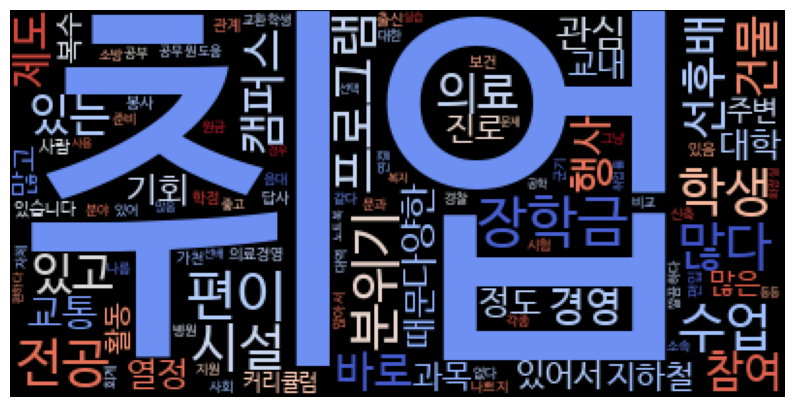

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400,colormap='coolwarm').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('애드캠퍼스_가천대_장점.png', bbox_inches='tight')
plt.show()

In [ ]:
df[df['장점'].str.contains('교수')]

,장점,단점,학교에바라는점
1,캠퍼스가 예쁘고 고양이가 많이 산다. 학교와 지하철이 바로 연결돼있다.\n교내 셔틀...,등록금이 비싸다. 최신식 건물에 비해 노후된 건물이 곳곳에\n있다.\n학교 근처에 ...,교내에서 스터디를 할 수 있는 공간이 필요하다.
2,장학금 제도가 잘되어있다.\n노트북 지원금 및 성적 지원금 등등 그 외에도 여러가지...,한 학번당 인원이 너무 많다보니 서로 누가누구인지 모르는 경\n우가 있다.\n그러다...,학과 분위기 개선 및 신입생에 한 해 원하는 사람들을 신청 받\n아 과동기를 알아가...
3,두루두루 친한 분위기라 과 분위기가 좋다.\n학술답사라던가 다양한 관광경영학과에 맞...,"두루두루 친하기는 하지만,,,, 친목의 흔적들이 남아 있다.\n약간의 꼰대문화가 아...",학교 및 학과에서 취업과 관련된 활동 지원 및 개최.
4,취업률이 높다. 교수진이 화려하고 생긴지 오래되진 않았지만\n선배들도 능력을 펼치는...,수업이 어렵다. 코딩 자체를 포기하는 경우도 종종 있다.\n교수진이 화려한데 학과장...,학교 엘리베이터 문제를 해결할 방법을 찾아야할 것 같다.\n또한 수업을 따라가기 어...
6,학교와 지하철이 바로 연결되어 있어 통학하기 편하다. 고속버 스 정거장도 있다.\n...,취업은 되지만 열악한 환경이거나 일에 비해 월급이 너무 적어 힘들다고 한다.\n또한...,"복지관이나 NGO 단체 취업을 적극 지원하면 좋을 것 같고, 학 교 자체에서 셔틀버..."
7,:\n1. 메이커스페이스가 있음. 쉽게 설명하자면 실습실인데 3d프 린터 커팅기 목...,1. 메이커스페이스는 타과 학생도 많이씀 애초에 산디과전용이 아니고 외부인도 사용하...,강의수를 다시 늘려주고 학교다니면서 등록금이 아깝지 않게 지원해주었으면 함.\n건물...
9,"교수님들이 친절하다, 봉사 기회가 많이 주어진다, 학우 간의 관계가 좋다, 학과 행...","학교 행정 처리가 늦다, 전과하는 학생들이 적지 않다, 취업 관 련 지원이 부족하다...","취업 관련 정보 제공, 과목별 팀플 갯수 조정, 수강신청 인원/\n수강 과목 증설"
10,"교수님이 열정적이고 친절하시다, 학교 주변에 놀거리가 없다, 교통이 좋은 편이다, ...","등록금이 비싸다, 건물이 낡았다(여름에는 시원하지만 겨울에 매우 춥다), 도서관에 ...","공대2 건물 보수, 교내 셔틀버스 증가, 과 지원금 증가"
11,"학과행사가 많다, 선후배간 관계가 좋다, 교수님이 학생들에 게 관심이 많아 상담을 ...","팀플이 많다, 뚜렷한 진로가 없으면 애매하다, 취업 정보가 적 다 발표 수업이 많다...","다양한 제2외국어 수업을 전공선택과목으로 넣었으면 좋겠다,\n선배들의 취업 후기 공유"
14,"학점이 어느정도 나오면 성적장학금 이외에 장학금이 나온다, 입학 시에 노트북 지원금...","특정 교수님 수업 때는 반바지 착용 금지이다, 엠티나 학과 행 사 필참이다, 3/4...",시대 흐름에 맞는 학과 분위기 형성을 위한 교수님의 개방적인 마인드


## 단점

In [ ]:
bad_text = ''
for temp in df['단점']:
    bad_text += str(temp)
bad_text = re.sub(r'[^가-힣a-zA-Z0-9]',' ',bad_text)
bad_text

'소방과와 설비과가 합쳐져 생긴 학과이다 보니 좀 어중간한 느 낌  학교 수업 자체가 기사 자격증을 취득하기 위한 하나의 교육  정도 라고 느껴지지만 전공 교수님들이 기사 시험 출제위원회 에 계신분들이 많아 오히려 장점이라고도 생각됨  동기들이 너무 많아 서로 얼굴도 모르는 경우가 대부분 등록금이 비싸다  최신식 건물에 비해 노후된 건물이 곳곳에 있다  학교 근처에 놀만한 것이 상대적으로 적다  건물 내부가 복잡 하다  강의실 방음이 잘 안된다   무당이  운행 시간이 짧고 배차간격 이 길다  선후배  동기간 친해질 계기가 적다 한 학번당 인원이 너무 많다보니 서로 누가누구인지 모르는 경 우가 있다  그러다보니 단합력도 떨어지는 경우가 있다  학과 행사에 강제로 참여해야하는 경우가 있다  주말도 예외아닌 경우 있음 두루두루 친하기는 하지만     친목의 흔적들이 남아 있다  약간의 꼰대문화가 아주 조금 남아있는 편이다  취업이 잘 안되다  정말 안된다  학교에서 취업관련 활동 지원이 약한 것 같다 수업이 어렵다  코딩 자체를 포기하는 경우도 종종 있다  교수진이 화려한데 학과장님이 빡세다  인원이 많아 교류가 없는 경우도 있다  학교 엘리베이터가 적어서 이용하기 힘들다 수강신청이 피터지게 어렵다  전공 제한 인원이 재학생 인원 수보다 적다  수업의 질이 소프트웨어학과에 비하면 좋지 않다  소프트웨어 학과를 더 밀어준다  또한 컴공이라 포기하는 학과생도 많다  마지막으로 인천에서 통학하기 너무 어려워서 입학하기 힘든 사람도 있는 것 같다 취업은 되지만 열악한 환경이거나 일에 비해 월급이 너무 적어 힘들다고 한다  또한 고속버스 정거장이 학교와 거리가 좀 있고 터널을 통과해 야해서 밤에는 위험하다  복지관 말고도 전공을 살려서 갈 수 있는 기업 취업 도움도 주 면 좋을 것 같다 1  메이커스페이스는 타과 학생도 많이씀 애초에 산디과전용이 아니고 외부인도 사용하는 곳임 2  미대건물이 낡고 디자인과 수업하는 강의실은 높은 층에 있 고 엘레베이터가 없다  새내기때는 

In [ ]:

# Okt 함수를 이용해 형태소 분석
okt = Okt()
b_line =[]

b_line = okt.pos(bad_text)

print(b_line)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in b_line:
    if tag in ['Noun','Adjective']:
        if len(word) > 1:
            n_adj.append(word)

[('소', 'Modifier'), ('방과', 'Noun'), ('와', 'Josa'), ('설비', 'Noun'), ('과', 'Noun'), ('가', 'Josa'), ('합쳐져', 'Verb'), ('생긴', 'Verb'), ('학과', 'Noun'), ('이다', 'Josa'), ('보니', 'Verb'), ('좀', 'Noun'), ('어중간한', 'Adjective'), ('느', 'Noun'), ('낌', 'Noun'), ('학교', 'Noun'), ('수업', 'Noun'), ('자체', 'Noun'), ('가', 'Josa'), ('기사', 'Noun'), ('자격증', 'Noun'), ('을', 'Josa'), ('취득', 'Noun'), ('하기', 'Verb'), ('위', 'Noun'), ('한', 'Josa'), ('하나', 'Noun'), ('의', 'Josa'), ('교육', 'Noun'), ('정도', 'Noun'), ('라고', 'Josa'), ('느껴지지만', 'Verb'), ('전공', 'Noun'), ('교수', 'Noun'), ('님', 'Suffix'), ('들이', 'Verb'), ('기사', 'Noun'), ('시험', 'Noun'), ('출제', 'Noun'), ('위원회', 'Noun'), ('에', 'Josa'), ('계', 'Noun'), ('신분', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('많아', 'Adjective'), ('오히려', 'Noun'), ('장점', 'Noun'), ('이라고도', 'Josa'), ('생각', 'Noun'), ('됨', 'Verb'), ('동기', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('너무', 'Adverb'), ('많아', 'Adjective'), ('서로', 'Noun'), ('얼굴', 'Noun'), ('도', 'Josa'), ('모르는', 'Verb'), ('경우', 'Noun'), ('가',

In [ ]:
#제외할 단어 추가
stop_words = "가천대 단점 교수 학교 학과 " #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]
n_adj
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('수업', 23),
 ('전공', 23),
 ('있다', 18),
 ('취업', 16),
 ('사람', 14),
 ('생각', 12),
 ('건물', 12),
 ('많다', 12),
 ('학생', 12),
 ('편이', 11),
 ('시험', 9),
 ('경우', 9),
 ('어렵다', 9),
 ('있는', 9),
 ('자체', 8),
 ('등록금', 8),
 ('정말', 8),
 ('대학', 8),
 ('같다', 7),
 ('많아', 6),
 ('인원', 6),
 ('조금', 6),
 ('힘들다', 6),
 ('수강신청', 6),
 ('없다', 6),
 ('커리큘럼', 6),
 ('좋은', 6),
 ('학년', 6),
 ('필수', 6),
 ('친구', 6),
 ('공부', 6),
 ('대한', 6),
 ('정도', 5),
 ('근처', 5),
 ('있음', 5),
 ('활동', 5),
 ('지원이', 5),
 ('빡세', 5),
 ('소프트웨어', 5),
 ('강의', 5),
 ('과목', 5),
 ('진로', 5),
 ('정보', 5),
 ('다른', 5),
 ('시설', 5),
 ('보건', 5),
 ('아닙니다', 5),
 ('비싸다', 4),
 ('강의실', 4),
 ('관련', 4),
 ('없는', 4),
 ('엘리베이터', 4),
 ('좋지', 4),
 ('통학', 4),
 ('처리', 4),
 ('전과', 4),
 ('매우', 4),
 ('없으면', 4),
 ('힘들', 4),
 ('가끔', 4),
 ('많아요', 4),
 ('있습니다', 4),
 ('의료', 4),
 ('수도', 4),
 ('선배', 4),
 ('그냥', 4),
 ('학점', 4),
 ('관심', 4),
 ('위주', 4),
 ('자격증', 3),
 ('취득', 3),
 ('장점', 3),
 ('대부분', 3),
 ('선후배', 3),
 ('누가', 3),
 ('단합', 3),
 ('강제', 3),
 ('종종', 3),
 ('거리', 3),
 ('있고', 3),
 ('미대

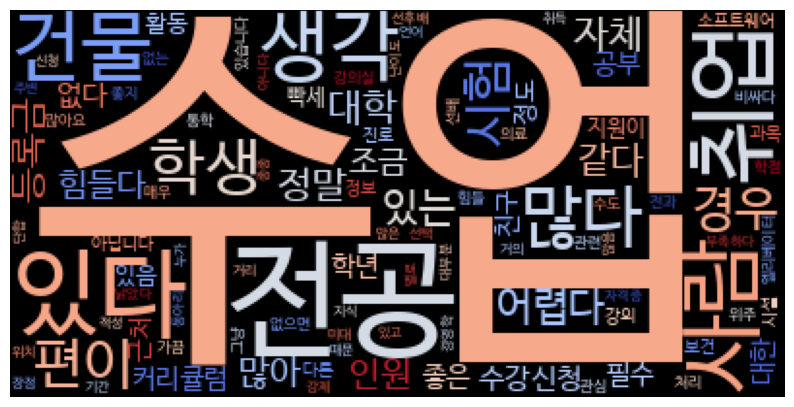

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400,colormap='coolwarm').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('애드캠퍼스_가천대_단점.png', bbox_inches='tight')
plt.show()

## 학교에 바라는 점

In [ ]:
wish_text = ''
for temp in df['학교에바라는점']:
    wish_text += str(temp)
wish_text = re.sub(r'[^가-힣a-zA-Z0-9]',' ',wish_text)
wish_text

'제발    같은 공대 건물 좀 어떻게 해주세요   그리고 설비 소방에 맞는 실험과목을 좀 더 만들어주셨으면 합니다 교내에서 스터디를 할 수 있는 공간이 필요하다 학과 분위기 개선 및 신입생에 한 해 원하는 사람들을 신청 받 아 과동기를 알아가는 시간 가지기학교 및 학과에서 취업과 관련된 활동 지원 및 개최 학교 엘리베이터 문제를 해결할 방법을 찾아야할 것 같다  또한 수업을 따라가기 어려운 학생들을 위해 보충 프로그램을 만들면 좋을 것 같다최소한 전공은 모두가 들을 수 있도록 해야한다  이건 모든 학 과가 마찬가지이다  교수진을 늘리고 수업을 대폭 늘려 학생의 선택권을 늘려야 한다 복지관이나 NGO 단체 취업을 적극 지원하면 좋을 것 같고  학 교 자체에서 셔틀버스를 만들어야 한다고 생각한다  각 지역 통학이 가능하도록 해야 한다 강의수를 다시 늘려주고 학교다니면서 등록금이 아깝지 않게 지원해주었으면 함  건물를 재건하기에는 무리가 있다고 생각하여 이해하지만 분 명 오고자하는 학생이 많은 과인데 다녀보면 그렇게 있다고 생 각하지 않게됨 다양한 커리큘럼을 마련하고 체계적인 행정 시스템을 구축할 필요가 있다고 생각한다 취업 관련 정보 제공  과목별 팀플 갯수 조정  수강신청 인원  수강 과목 증설공대2 건물 보수  교내 셔틀버스 증가  과 지원금 증가다양한 제2외국어 수업을 전공선택과목으로 넣었으면 좋겠다  선배들의 취업 후기 공유문과학생이나 보충학습이 필요한 학생들을 위한 선후배간 멘토링 프로그램수강신청 시에 타과 전공 신청의 기회가 열려있어야 한다시대 흐름에 맞는 학과 분위기 형성을 위한 교수님의 개방적인 마인드건물 보수  엘리베이터 추가 설치  커리큘럼 재구성  본과생 복 부전생 수강신청 제도 개선  학과 내 프로젝트 지원복 부전생을 무작정 모두 받지 않고  타과처럼 심사를 거쳐야 한다전문직이나 로스쿨 진학을 위한 학과 수업 개설사회복지학과 동아리를 더 늘려주셨으면 좋겠어요바이오나노대학 엘리베이터 설치  시설 보수  연구장학생 홍보  학교 주변 놀거리금융수

In [ ]:

# Okt 함수를 이용해 형태소 분석
okt = Okt()
w_list =[]

w_list = okt.pos(wish_text)

print(w_list)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in w_list:
    if tag in ['Noun','Adjective']:
        if len(word) > 1:
            n_adj.append(word)

[('제발', 'Noun'), ('같은', 'Adjective'), ('공대', 'Noun'), ('건물', 'Noun'), ('좀', 'Noun'), ('어떻게', 'Adjective'), ('해주세요', 'Verb'), ('그리고', 'Conjunction'), ('설비', 'Noun'), ('소방', 'Noun'), ('에', 'Josa'), ('맞는', 'Verb'), ('실험', 'Noun'), ('과목', 'Noun'), ('을', 'Josa'), ('좀', 'Noun'), ('더', 'Noun'), ('만들어주셨으면', 'Verb'), ('합니다', 'Verb'), ('교내', 'Noun'), ('에서', 'Josa'), ('스터디', 'Noun'), ('를', 'Josa'), ('할', 'Verb'), ('수', 'Noun'), ('있는', 'Adjective'), ('공간', 'Noun'), ('이', 'Josa'), ('필요하다', 'Adjective'), ('학과', 'Noun'), ('분위기', 'Noun'), ('개선', 'Noun'), ('및', 'Noun'), ('신입생', 'Noun'), ('에', 'Josa'), ('한', 'Verb'), ('해', 'Noun'), ('원하는', 'Adjective'), ('사람', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('신청', 'Noun'), ('받', 'Verb'), ('아', 'Exclamation'), ('과동', 'Noun'), ('기를', 'Verb'), ('알아가는', 'Verb'), ('시간', 'Noun'), ('가지', 'Noun'), ('기', 'Modifier'), ('학교', 'Noun'), ('및', 'Noun'), ('학과', 'Noun'), ('에서', 'Josa'), ('취업', 'Noun'), ('과', 'Josa'), ('관련', 'Noun'), ('된', 'Verb'), ('활동', 'Noun'), ('지원', 'Noun'

In [ ]:
#제외할 단어 추가
stop_words = "가천대 교수 학교 학과 좋겠다" #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]
n_adj
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('취업', 12),
 ('학생', 10),
 ('생각', 9),
 ('건물', 8),
 ('지원', 8),
 ('과목', 6),
 ('관련', 6),
 ('엘리베이터', 6),
 ('전공', 6),
 ('있는', 5),
 ('수업', 5),
 ('커리큘럼', 5),
 ('강의', 4),
 ('다양한', 4),
 ('수강신청', 4),
 ('대학', 4),
 ('시설', 4),
 ('경우', 4),
 ('관심', 4),
 ('분야', 4),
 ('고민', 4),
 ('제발', 3),
 ('교내', 3),
 ('개선', 3),
 ('신청', 3),
 ('같다', 3),
 ('프로그램', 3),
 ('최소한', 3),
 ('있다고', 3),
 ('많은', 3),
 ('보수', 3),
 ('좋겠어요', 3),
 ('진짜', 3),
 ('전과', 3),
 ('있습니다', 3),
 ('준비', 3),
 ('우리', 3),
 ('보고', 3),
 ('같은', 2),
 ('공대', 2),
 ('어떻게', 2),
 ('분위기', 2),
 ('가지', 2),
 ('활동', 2),
 ('보충', 2),
 ('좋을', 2),
 ('모두', 2),
 ('있도록', 2),
 ('선택', 2),
 ('자체', 2),
 ('셔틀버스', 2),
 ('다시', 2),
 ('등록금', 2),
 ('체계', 2),
 ('필요', 2),
 ('수강', 2),
 ('증가', 2),
 ('개방', 2),
 ('설치', 2),
 ('구성', 2),
 ('전생', 2),
 ('복지', 2),
 ('조금', 2),
 ('학우', 2),
 ('많아서', 2),
 ('괜찮은데', 2),
 ('복수', 2),
 ('자신', 2),
 ('교사', 2),
 ('내용', 2),
 ('수도', 2),
 ('안주', 2),
 ('학회', 2),
 ('공부', 2),
 ('없는', 2),
 ('입니다', 2),
 ('본인', 2),
 ('있다는', 2),
 ('계열', 2),
 ('진로', 2),
 ('문과', 2),

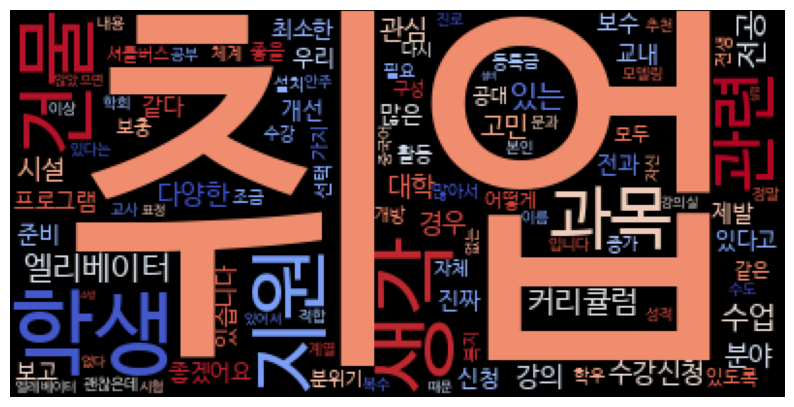

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400,colormap='coolwarm').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('애드캠퍼스_가천대_바라는점.png', bbox_inches='tight')
plt.show()